In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob 

In [2]:
files = sorted(glob.glob('cmip6/monthly/*.nc'))

In [56]:
DS = []
count = 0
for file in files:
    ds = xr.open_dataset(file)
    if count == 12:
        ds['SIV'] = ds.SIV/1e2
        ds['sivol'] = ds.sivol/1e2
        ds['sithick'] = ds.sithick/1e2
    else:
        pass
    count += 1
    DS.append(ds)
    
data = xr.concat(DS, dim = 'model')
data = data.transpose('time','y','x', 'model')

In [12]:
cs2 = xr.open_dataset('cs2_landy_data.nc')
pio = xr.open_dataset('piomas_biweekly_data.nc')

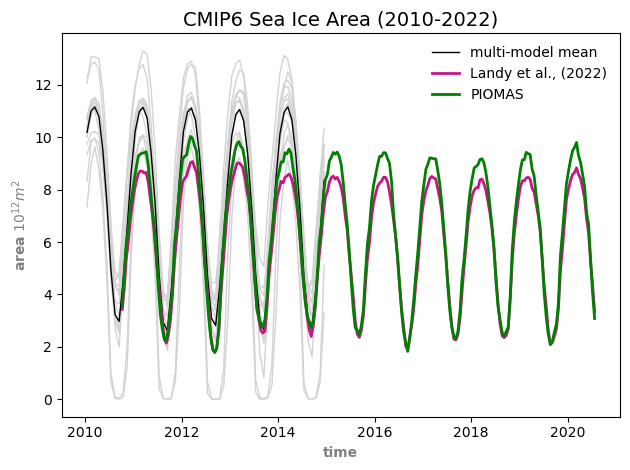

In [57]:
plt.plot(data.time, data.SIA/1e12, color = 'lightgrey', linewidth = 1)
plt.plot(data.time, data.SIA.mean(dim = 'model')/1e12, color= 'black', linewidth = 1, label= 'multi-model mean')
plt.plot(cs2.time, cs2.SIA/1e12, color = 'mediumvioletred', linewidth = 2, label = 'Landy et al., (2022)')
plt.plot(pio.time, pio.SIA/1e12, color = 'green', linewidth = 2, label = 'PIOMAS')
plt.legend(frameon = False)

plt.ylabel('area $10^{12} m^2$', fontweight='bold', color='grey')
plt.xlabel('time', fontweight='bold', color='grey')
plt.title('CMIP6 Sea Ice Area (2010-2022)', fontsize = 14)
plt.tight_layout()

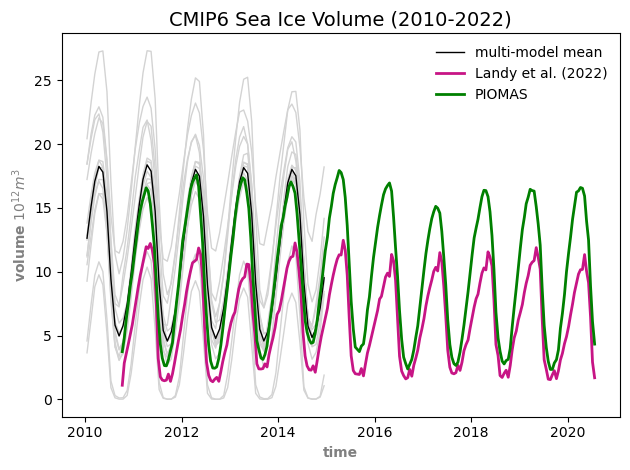

In [58]:
plt.plot(data.time, data.SIV/1e12, color = 'lightgrey', linewidth = 1)
plt.plot(data.time, data.SIV.mean(dim = 'model')/1e12, color= 'black', linewidth = 1, label= 'multi-model mean')
plt.plot(cs2.time, cs2.SIV/1e12, color = 'mediumvioletred', linewidth = 2, label = 'Landy et al. (2022)')
plt.plot(pio.time, pio.SIV/1e12, color = 'green', linewidth = 2, label = 'PIOMAS')
plt.legend(frameon = False)

plt.ylabel('volume $10^{12} m^3$', fontweight='bold', color='grey')
plt.xlabel('time', fontweight='bold', color='grey')
plt.title('CMIP6 Sea Ice Volume (2010-2022)', fontsize = 14)
plt.tight_layout()